# Script para fazer análise exploratória dos discursos da câmara federal
- analisar frequência de termos(tokens)
- analisar frequencia N-grams (2grams, 3grams)

Esse procedimento será feito para tentar identificar alguma informação útil ou mais alguma limpeza que seja necessária ser feita em `limpa-texto`

In [ ]:
#https://kavita-ganesan.com/how-to-use-countvectorizer/#.XubRLkVKhPY
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = "../data/csvs/"
discursos = pd.read_csv(directory+'discursos_plen_limpo.csv')

In [3]:
discursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
FILE                498 non-null object
ORIGINAL_CONTENT    498 non-null object
CLEAN_CONTENT       498 non-null object
SESSION_TYPE        498 non-null object
SESSION_DATE        498 non-null object
MONTH               498 non-null int64
YEAR                498 non-null int64
SPEAKER_COUNT       498 non-null int64
dtypes: int64(3), object(5)
memory usage: 31.2+ KB


## Bag of words (matriz com contagem absolutas das palavras)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer   = CountVectorizer(ngram_range = (1,1))
vectorizer_2 = CountVectorizer(ngram_range = (2,2))
vectorizer_3 = CountVectorizer(ngram_range = (2,2))

# tokenize and build vocab
vectorizer.fit(discursos.CLEAN_CONTENT)
vectorizer_2.fit(discursos.CLEAN_CONTENT)
vectorizer_3.fit(discursos.CLEAN_CONTENT)


CountVectorizer(ngram_range=(2, 2))

In [5]:
# encode document
vector = vectorizer.transform(discursos.CLEAN_CONTENT)
vector_2 = vectorizer_2.transform(discursos.CLEAN_CONTENT)
vector_3 = vectorizer_3.transform(discursos.CLEAN_CONTENT)

# summarize encoded vector
print(vector.shape)
print(vector_2.shape)
print(vector_3.shape)


(498, 20669)
(498, 115427)
(498, 115427)


In [6]:
## criando dataframe com matriz das plavras

count_tokens = pd.DataFrame({'token':vectorizer.get_feature_names(),'qtd':vector.toarray().sum(axis=0)})
count_tokens.sort_values(by = 'qtd',ascending=False, inplace = True)

count_tokens_2 = pd.DataFrame({'token':vectorizer_2.get_feature_names(),'qtd':vector_2.toarray().sum(axis=0)})
count_tokens_2.sort_values(by = 'qtd',ascending=False, inplace = True)

count_tokens_3 = pd.DataFrame({'token':vectorizer_3.get_feature_names(),'qtd':vector_3.toarray().sum(axis=0)})
count_tokens_3.sort_values(by = 'qtd',ascending=False, inplace = True)

## Análise da frequência de tokens(words)
`top 100`

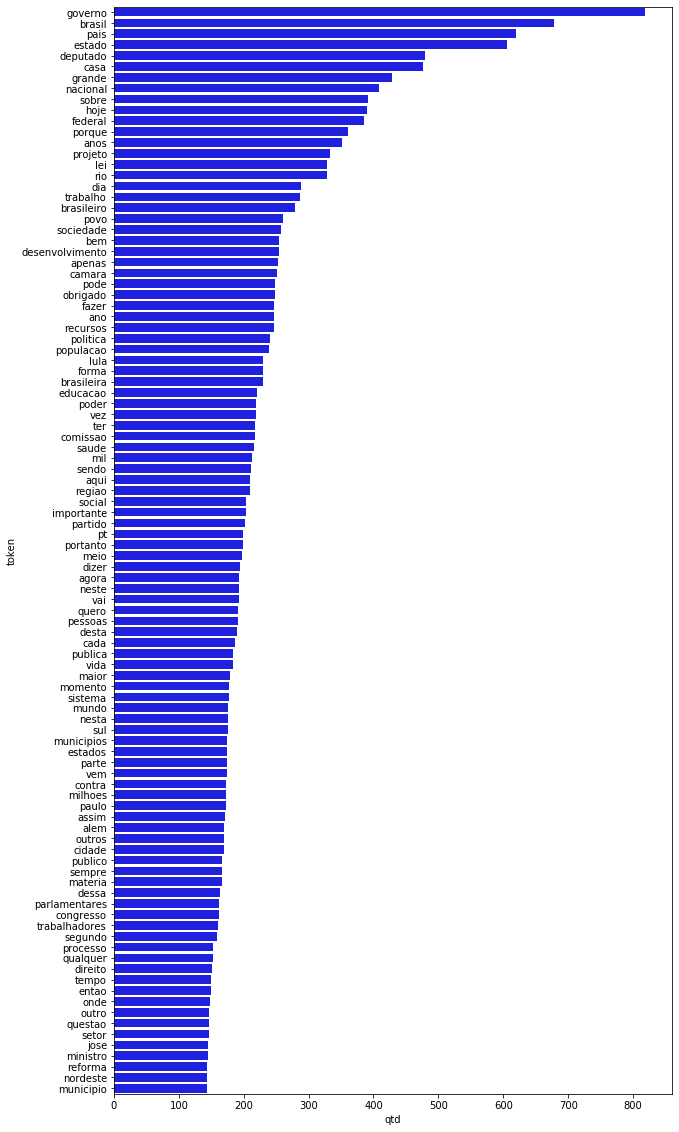

In [7]:
i = 100
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens.iloc[:i,:], color = 'blue')
plt.show()


## Análise da frequência de 2-grams (2 palavras )
`top 100`

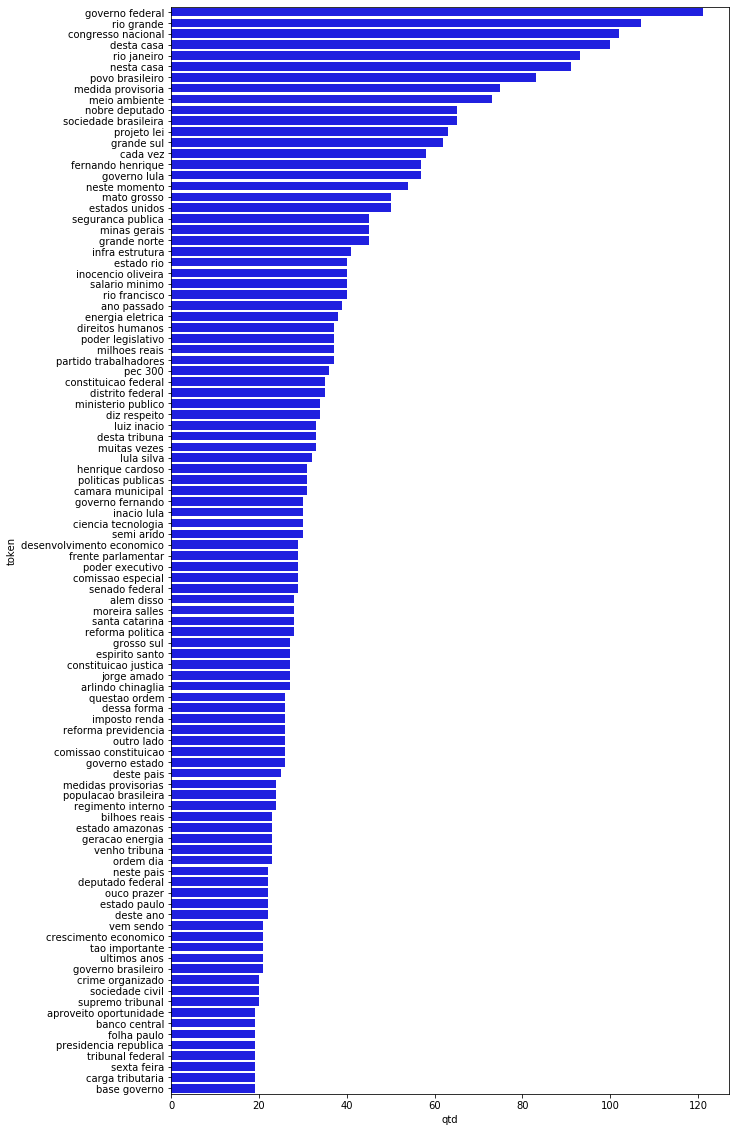

In [8]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_2.iloc[:i,:], color = 'blue')
plt.show()


## Análise da frequência de 3-grams(3 palavras)
`top 100`

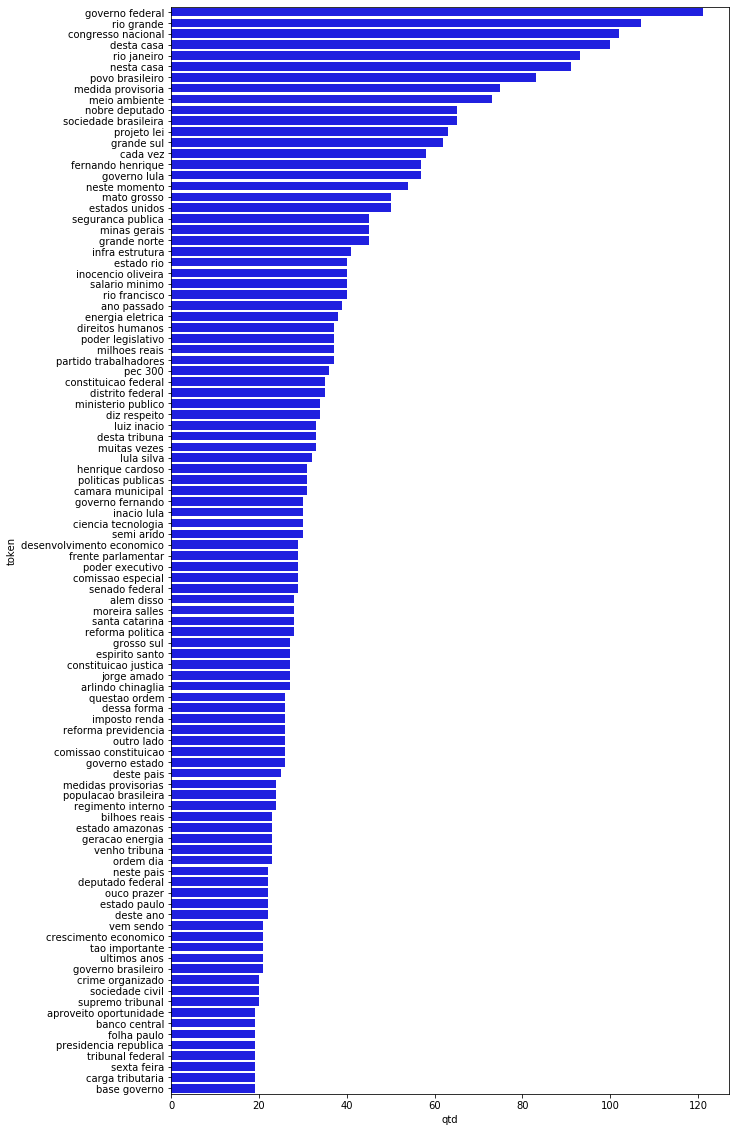

In [9]:
plt.figure(figsize=(10,20))
sns.barplot(y = 'token', x = 'qtd', data = count_tokens_3.iloc[:i,:], color = 'blue')
plt.show()
